# Housing Prices

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.
https://www.kaggle.com/anthonypino/melbourne-housing-market

# Introduction (via Kaggle)
## Content and Acknowledgments

This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

....Now with extra data including including property size, land size and council area, you may need to change your code!

## Some Key Details

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

# Preparing the Data
## Loading the Data

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
df = pd.read_csv('./melbourne-housing-market/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Data Exploration

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

We have a maximum of 34,857 values in any given feature, although most of them have a count much lower than this (probably due to null values). Let's investigate this further and check to see how many missing values each feature has.

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Let's also check the unique values in each feature.

In [7]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

Most of our categorical features have a reasonable number of unique values, aside from perhaps `Suburb`. There are quite a few missing values for a bunch of different features, which we need to take care of. We can fill in the missing values using imputation, but we have to be careful not to impute values of our target variable, `Price`. For our target, we will simply combine the data and target DataFrames and then drop the missing rows from the combined DataFrame. This will ensure that the correct rows are dropped in both the data and target. Then, we can split up the data and target for modeling purposes.

## Feature Engineering

Let's change the categorical variable datatypes to `category` so that we can use `get_dummies` later on.

In [8]:
categories = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
for category in categories:
    df[category] = df[category].astype('category')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
df.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date             category
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object

Let's also get rid of the values that don't make sense, i.e. 0 bathrooms or 0 bedrooms. We will replace these with NaN.

In [10]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [11]:
df.Bedroom2 = df.Bedroom2.map(lambda x: x if x>0 else None)
df.Bathroom = df.Bathroom.map(lambda x: x if x>0 else None)
df.Car = df.Car.map(lambda x: x if x>0 else None)
df.Landsize = df.Landsize.map(lambda x: x if x>0 else None)
df.BuildingArea = df.BuildingArea.map(lambda x: x if x>0 else None)
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26623.000000,26585.000000,24498.000000,20610.000000,13666.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.086617,1.627610,1.843946,663.788258,161.147626,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.977899,0.721675,0.936712,3587.696265,402.202853,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,0.010000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,306.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,557.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,692.000000,188.000000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


We will drop outliers in our target variable, `Price`, by first converting them to NaN.

In [12]:
df.Price = df.Price.map(lambda x: x if x < df.Price.mean()+3*df.Price.std() else None)

In [13]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.677300e+04,34856.000000,34856.000000,26623.000000,26585.000000,24498.000000,20610.000000,13666.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.000273e+06,11.184929,3116.062859,3.086617,1.627610,1.843946,663.788258,161.147626,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,5.091487e+05,6.788892,109.023903,0.977899,0.721675,0.936712,3587.696265,402.202853,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,0.010000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.310000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,306.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.600000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,557.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.260000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,692.000000,188.000000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,2.960000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [14]:
df.head(1000)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,NaN,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,NaN,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,NaN,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [15]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             8084
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8234
Bathroom          8272
Car              10359
Landsize         14247
BuildingArea     21191
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Now we can drop null values.

In [16]:
df = df.dropna()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0


Let's extract our data and target.

In [17]:
data = df.drop(['Price'], 1)
target = df.loc[:, ['Price']]
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,2.5,3067.0,3.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,2.5,3067.0,2.0,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0


In [18]:
target.head()

,Price
6,1600000.0
14,1636000.0
18,1097000.0
24,1350000.0
30,1310000.0


Now let's impute the missing values in our continuous features by filling them with the mean. We will also impute the missing values in our categorical features by filling them with the most frequently occurring value. 

In [19]:
# Continuous values
#data.fillna(data.mean(), inplace=True)

# Categorical values
#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

#data.head()

Now, it is safe to join our `data` and `target` DataFrames. We will do an inner (left) join.

In [20]:
data = data.join(target)
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1600000.0
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,2.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1636000.0
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,2.5,3067.0,3.0,...,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1097000.0
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,2.5,3067.0,3.0,...,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,1350000.0
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,2.5,3067.0,2.0,...,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,1310000.0


Let's verify that `Price` is now the only column with missing values.

In [21]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Price            0
dtype: int64

Good. Now we can simply use `dropna()`.

In [22]:
data = data.dropna()
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1600000.0
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,2.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1636000.0
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,2.5,3067.0,3.0,...,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1097000.0
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,2.5,3067.0,3.0,...,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,1350000.0
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,2.5,3067.0,2.0,...,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,1310000.0


In [23]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Price            0
dtype: int64

In [24]:
data.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Method           category
SellerG          category
Date             category
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
Price             float64
dtype: object

Let's look at a heat map of our data to see the correlations among the continuous features.

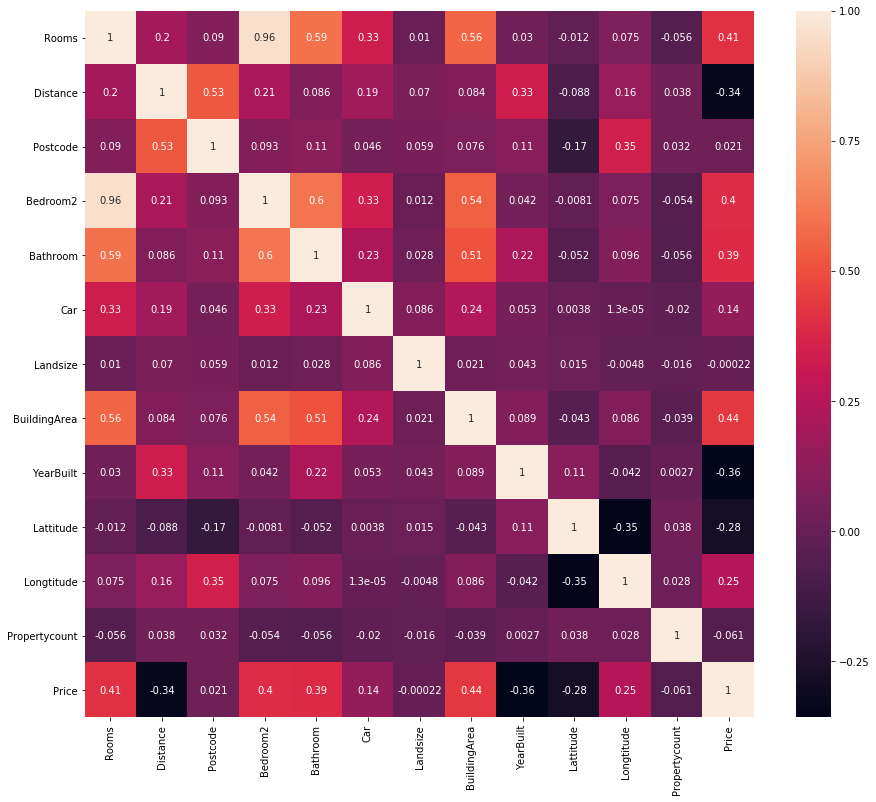

In [25]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(), annot=True)

We can see that `Rooms` and `Bedroom2` have extremely high multicollinearity. We will drop `Bedroom2`. The rest of the correlation coefficients look reasonable.

In [26]:
data = data.drop(['Bedroom2'], axis=1)

In [27]:
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1600000.0
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1636000.0
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,2.5,3067.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1097000.0
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,2.5,3067.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,1350000.0
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,2.5,3067.0,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,1310000.0


Now let's look at the distribution of each feature and Price.

### Rooms

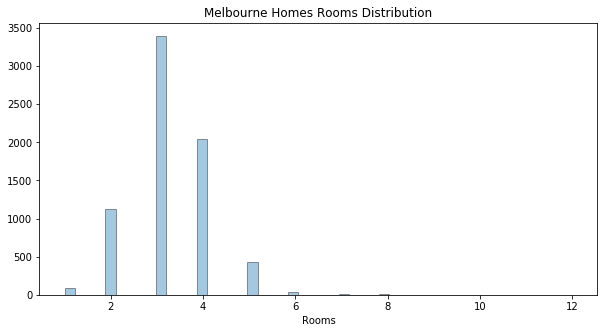

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data['Rooms'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Rooms Distribution')
plt.show()

### Distance

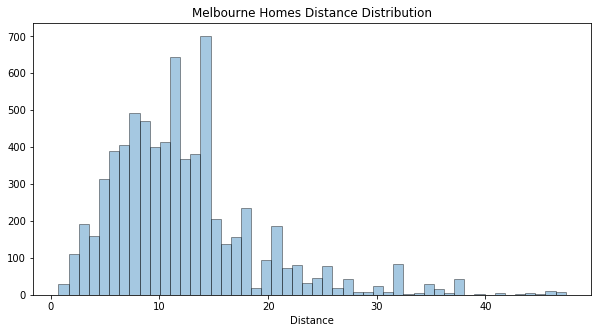

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(data['Distance'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Distance Distribution')
plt.show()

The distribution appears to have a right skew. Using a cube root transformation is effective in somewhat normalizing the data.

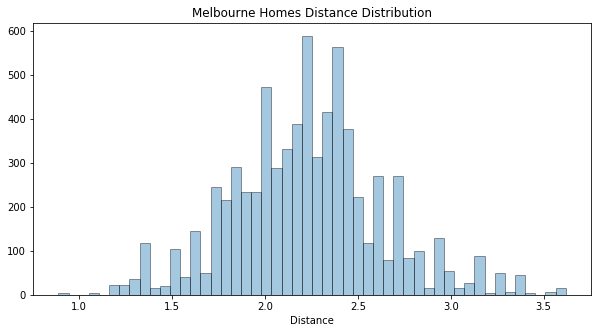

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(np.cbrt(data['Distance']), kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Distance Distribution')
plt.show()

### Bathrooms

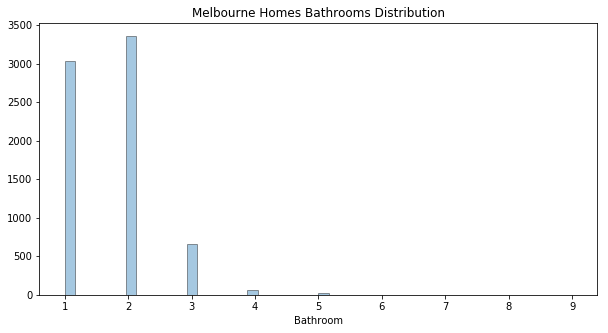

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(data['Bathroom'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Bathrooms Distribution')
plt.show()

We will leave `Bathrooms` alone as it is a discrete feature.

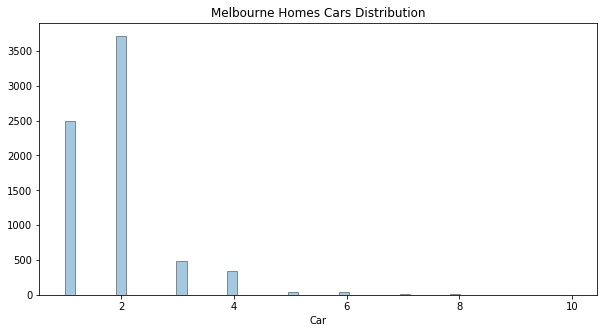

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(data['Car'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Cars Distribution')
plt.show()

### Landsize

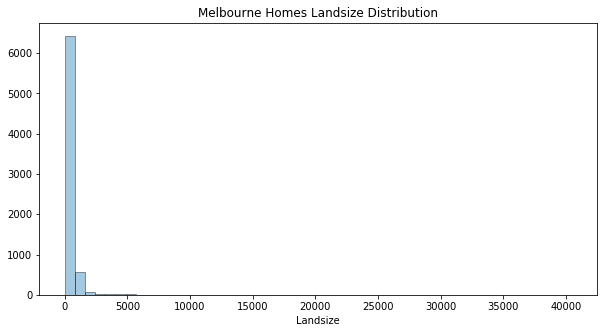

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(data['Landsize'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Landsize Distribution')
plt.show()

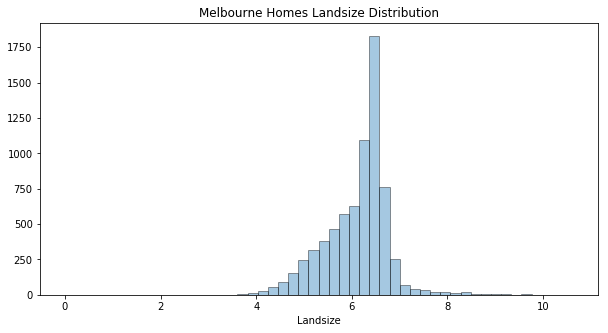

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(data['Landsize']), kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Landsize Distribution')
plt.show()

### Building Area

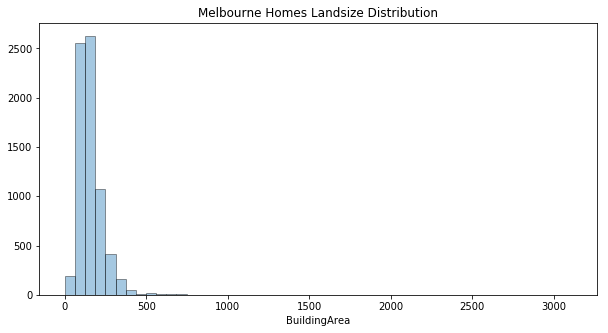

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(data['BuildingArea'], kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Landsize Distribution')
plt.show()

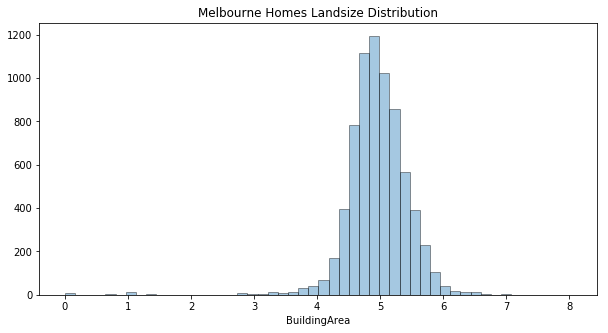

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(data['BuildingArea']), kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Landsize Distribution')
plt.show()

### Price

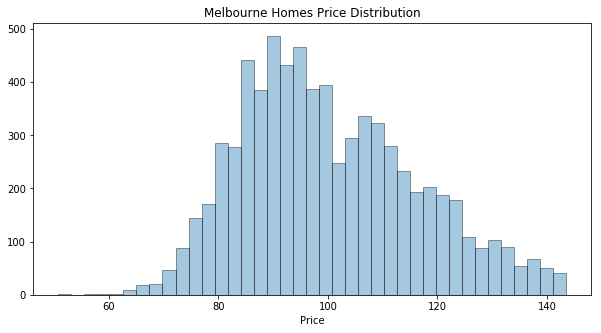

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(np.cbrt(data['Price']), kde = False, hist_kws=dict(edgecolor="k"))
plt.title('Melbourne Homes Price Distribution')
plt.show()

Let's transform our desired continuous features using the above transformations.

In [38]:
data.head(100)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1600000.0
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1636000.0
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,2.5,3067.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,1097000.0
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,2.5,3067.0,2.0,2.0,214.0,190.0,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,1350000.0
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,2.5,3067.0,1.0,2.0,238.0,97.0,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,1310000.0
32,Abbotsford,42 Henry St,3,h,S,Jellis,16/07/2016,2.5,3067.0,2.0,1.0,113.0,110.0,1880.0,Yarra City Council,-37.8056,144.9930,Northern Metropolitan,4019.0,1200000.0
35,Abbotsford,78 Yarra St,3,h,S,LITTLE,16/07/2016,2.5,3067.0,1.0,1.0,138.0,105.0,1890.0,Yarra City Council,-37.8021,144.9965,Northern Metropolitan,4019.0,1176500.0
37,Abbotsford,42 Valiant St,2,h,S,Biggin,17/09/2016,2.5,3067.0,1.0,1.0,150.0,73.0,1985.0,Yarra City Council,-37.8011,145.0004,Northern Metropolitan,4019.0,890000.0
38,Abbotsford,3/72 Charles St,4,h,PI,Kay,18/03/2017,2.5,3067.0,2.0,2.0,780.0,135.0,1900.0,Yarra City Council,-37.8073,144.9952,Northern Metropolitan,4019.0,1330000.0
43,Abbotsford,52a William St,2,h,PI,Biggin,18/06/2016,2.5,3067.0,2.0,1.0,124.0,135.0,2013.0,Yarra City Council,-37.8079,144.9977,Northern Metropolitan,4019.0,1100000.0


In [39]:
data['Distance'] = np.cbrt(data['Distance'])
data['Landsize'] = np.log(data['Landsize'])
data['BuildingArea'] = np.log(data['BuildingArea'])
data['Price'] = np.cbrt(data['Price'])
data.head(100)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,1.357209,3067.0,1.0,2.0,4.787492,4.955827,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,116.960710
14,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,1.357209,3067.0,1.0,2.0,5.545177,4.672829,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,117.831417
18,Abbotsford,10 Valiant St,2,h,S,Biggin,8/10/2016,1.357209,3067.0,1.0,2.0,5.393628,4.317488,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,103.134082
24,Abbotsford,40 Nicholson St,3,h,VB,Nelson,12/11/2016,1.357209,3067.0,2.0,2.0,5.365976,5.247024,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,110.520945
30,Abbotsford,16 William St,2,h,S,Jellis,15/10/2016,1.357209,3067.0,1.0,2.0,5.472271,4.574711,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,109.418418
32,Abbotsford,42 Henry St,3,h,S,Jellis,16/07/2016,1.357209,3067.0,2.0,1.0,4.727388,4.700480,1880.0,Yarra City Council,-37.8056,144.9930,Northern Metropolitan,4019.0,106.265857
35,Abbotsford,78 Yarra St,3,h,S,LITTLE,16/07/2016,1.357209,3067.0,1.0,1.0,4.927254,4.653960,1890.0,Yarra City Council,-37.8021,144.9965,Northern Metropolitan,4019.0,105.567599
37,Abbotsford,42 Valiant St,2,h,S,Biggin,17/09/2016,1.357209,3067.0,1.0,1.0,5.010635,4.290459,1985.0,Yarra City Council,-37.8011,145.0004,Northern Metropolitan,4019.0,96.190017
38,Abbotsford,3/72 Charles St,4,h,PI,Kay,18/03/2017,1.357209,3067.0,2.0,2.0,6.659294,4.905275,1900.0,Yarra City Council,-37.8073,144.9952,Northern Metropolitan,4019.0,109.972445
43,Abbotsford,52a William St,2,h,PI,Biggin,18/06/2016,1.357209,3067.0,2.0,1.0,4.820282,4.905275,2013.0,Yarra City Council,-37.8079,144.9977,Northern Metropolitan,4019.0,103.228012


Now let's extract our updated `Price` column into `target`.

In [40]:
target = data.loc[:, ['Price']]
target.head()

,Price
6,116.960710
14,117.831417
18,103.134082
24,110.520945
30,109.418418


Now let's drop the following three features, as they have little use for our analysis.
* `Address`
* `SellerG`
* `Date`

In [41]:
data = data.drop(['Address', 'SellerG', 'Date'], 1)
data.head()

,Suburb,Rooms,Type,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
6,Abbotsford,4,h,VB,1.357209,3067.0,1.0,2.0,4.787492,4.955827,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,116.960710
14,Abbotsford,2,h,S,1.357209,3067.0,1.0,2.0,5.545177,4.672829,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,117.831417
18,Abbotsford,2,h,S,1.357209,3067.0,1.0,2.0,5.393628,4.317488,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0,103.134082
24,Abbotsford,3,h,VB,1.357209,3067.0,2.0,2.0,5.365976,5.247024,2005.0,Yarra City Council,-37.8085,144.9964,Northern Metropolitan,4019.0,110.520945
30,Abbotsford,2,h,S,1.357209,3067.0,1.0,2.0,5.472271,4.574711,1890.0,Yarra City Council,-37.8090,144.9976,Northern Metropolitan,4019.0,109.418418


In [42]:
cont_features = data.loc[:, ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']]
cont_features.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
6,4,1.357209,1.0,2.0,4.787492,4.955827,116.960710
14,2,1.357209,1.0,2.0,5.545177,4.672829,117.831417
18,2,1.357209,1.0,2.0,5.393628,4.317488,103.134082
24,3,1.357209,2.0,2.0,5.365976,5.247024,110.520945
30,2,1.357209,1.0,2.0,5.472271,4.574711,109.418418


In [43]:
cont_features.shape

(7139, 7)

Let's write a function to easily create a scatter plot for any given x and y with our desired features.

In [44]:
def plot_scatter(feature, target, data):
    print(feature)
    print(target)
    #plt.figure(figsize=(5,5))
    plt.scatter(x=feature, y=target, data=data)
    plt.title(target + ' vs. ' + feature)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

cols = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

#for col in cols:
#    plot_scatter(col, 'Price', cont_features)

In [45]:
print(cont_features.dtypes)

Rooms             int64
Distance        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
Price           float64
dtype: object


We will drop outliers.

In [46]:
cont_features.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
6,4,1.357209,1.0,2.0,4.787492,4.955827,116.960710
14,2,1.357209,1.0,2.0,5.545177,4.672829,117.831417
18,2,1.357209,1.0,2.0,5.393628,4.317488,103.134082
24,3,1.357209,2.0,2.0,5.365976,5.247024,110.520945
30,2,1.357209,1.0,2.0,5.472271,4.574711,109.418418


In [47]:
cont_features.shape

(7139, 7)

Let's generate our scatter plots again.

In [48]:
cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

#for col in cols:
#    plot_scatter(col, 'Price', cont_features)

In [49]:
cat_features = data.loc[:, ['Type', 'Method', 'CouncilArea', 'Regionname', 'YearBuilt']]
cat_features.head()

,Type,Method,CouncilArea,Regionname,YearBuilt
6,h,VB,Yarra City Council,Northern Metropolitan,2014.0
14,h,S,Yarra City Council,Northern Metropolitan,1890.0
18,h,S,Yarra City Council,Northern Metropolitan,1900.0
24,h,VB,Yarra City Council,Northern Metropolitan,2005.0
30,h,S,Yarra City Council,Northern Metropolitan,1890.0


Now let's convert `YearBuilt` to a categorical variable.

In [50]:
cat_features['YearBuilt'] = cat_features['YearBuilt'].map(lambda x: 'Old' if x < 2000 else 'New')
cat_features.head()

,Type,Method,CouncilArea,Regionname,YearBuilt
6,h,VB,Yarra City Council,Northern Metropolitan,New
14,h,S,Yarra City Council,Northern Metropolitan,Old
18,h,S,Yarra City Council,Northern Metropolitan,Old
24,h,VB,Yarra City Council,Northern Metropolitan,New
30,h,S,Yarra City Council,Northern Metropolitan,Old


In [51]:
cat_features = pd.get_dummies(data=cat_features)
cat_features.head()

,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt_New,YearBuilt_Old
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
24,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
30,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [52]:
X = cont_features.join(cat_features).drop(['Price'], axis=1)
print(X.dtypes)
print(X.shape)
X.describe()

Rooms                                           int64
Distance                                      float64
Bathroom                                      float64
Car                                           float64
Landsize                                      float64
BuildingArea                                  float64
Type_h                                          uint8
Type_t                                          uint8
Type_u                                          uint8
Method_PI                                       uint8
Method_PN                                       uint8
Method_S                                        uint8
Method_SA                                       uint8
Method_SN                                       uint8
Method_SP                                       uint8
Method_SS                                       uint8
Method_VB                                       uint8
Method_W                                        uint8
CouncilArea_Banyule City Cou

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Type_h,Type_t,Type_u,Method_PI,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt_New,YearBuilt_Old
count,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,...,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000
mean,3.248634,2.229608,1.695616,1.867208,6.121077,4.953319,0.819162,0.087827,0.093010,0.122006,...,0.129010,0.006303,0.286455,0.008264,0.050147,0.264183,0.249895,0.005743,0.254237,0.745763
std,0.879841,0.409060,0.706965,0.902979,0.678274,0.502455,0.384911,0.283064,0.290467,0.327316,...,0.335234,0.079149,0.452136,0.090539,0.218264,0.440928,0.432982,0.075571,0.435462,0.435462
min,1.000000,0.887904,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.974681,1.000000,1.000000,5.743003,4.700480,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.237378,2.000000,2.000000,6.300786,4.941642,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.449660,2.000000,2.000000,6.507278,5.231109,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,12.000000,3.619035,9.000000,10.000000,10.608292,8.043021,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
Y = cont_features.loc[:, ['Price']]
print(Y.dtypes)
print(Y.shape)
Y.head()

Price    float64
dtype: object
(7139, 1)


,Price
6,116.960710
14,117.831417
18,103.134082
24,110.520945
30,109.418418


### Modeling

In [56]:
Y = np.ravel(Y)
print(Y)

[116.96070953 117.83141683 103.13408246 ...  82.91344342  96.11791067
  89.00130453]


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
scores = cross_val_score(lm, X, Y, cv=10)
print('Coefficients:\n', lm.coef_)
print('Intercept:\n', lm.intercept_)
print('Score With 20% Holdout:\n{0:.2%}'.format(lm.score(X_test, Y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

Coefficients:
 [ 3.42003730e+00 -1.99748716e+01  2.31511280e+00  7.67067164e-01
  1.14589050e+00  5.56192731e+00 -9.09141407e+11 -9.09141407e+11
 -9.09141407e+11  8.71308368e+11  2.73952067e+10  8.71308368e+11
  8.71308368e+11  2.26947254e+10  8.71308368e+11  3.26776593e+10
  8.71308368e+11  2.79239316e+10 -1.54324994e+10 -1.54324993e+10
 -1.54324993e+10 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324993e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324993e+10 -1.54324994e+10 -1.54324994e+10
 -1.54324994e+10 -1.54324994e+10 -1.54324994e+10  9.14483489e+11
  9.14483489e+11  9.14483489e+11  9.14483489e+11  9.14483489e+11
  9.14483489e+11  9.14483489e+11  9.14483489e+11  4.62385568e+10
  4.623855

Despite the messy data, our average cross validation accuracy with a basic linear regression model wasn't terrible, at 67.73%. However, it can obviously still be a lot better. Due to the fact that numerous features in this dataset violate the assumptions of linear regression, this doesn't appear to be the best choice of model for this dataset. We will try others.

In [59]:
rfc = RandomForestRegressor(criterion='mse', max_depth=10)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
scores = cross_val_score(rfc, X, Y, cv=10)
print('Score With 20% Holdout:\n{0:.2%}'.format(rfc.score(X_test, Y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score With 20% Holdout:
82.83%
Cross Validation Scores:
 [0.7729072  0.78222042 0.78639493 0.76372506 0.81975449 0.81365866
 0.799588   0.83549526 0.84491627 0.84225318]
Average Cross Validation Score:
80.61%


Random forest offers improved accuracy over linear regression, as we can see here. We achieved an accuracy score of 82.01% with 20% holdout, while our average cross validation score was 80.93%.

In [60]:
rr = linear_model.Ridge(alpha=1, fit_intercept=False) 
rr.fit(X_train, Y_train)
#print(rr.score(X_train, Y_train))
origparams = rr.coef_[0]
print(origparams)

print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, Y_test)))


'''rrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
rrBig.fit(X_train2, Y_train)
print(rrBig.score(X_train, Y_train))
newparams = rrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)'''

3.3716625576259056
Score With 20% Holdout:
77.31%


"rrBig = linear_model.Ridge(alpha=10, fit_intercept=False)\nrrBig.fit(X_train2, Y_train)\nprint(rrBig.score(X_train, Y_train))\nnewparams = rrBig.coef_[0, 0:len(origparams)]\n\nprint('\nParameter Estimates for the same predictors for the small model'\n      'and large model:')\ncompare = np.column_stack((origparams, newparams))\nprettycompare = np.array2string(\n    compare,\n    formatter={'float_kind':'{0:.3f}'.format})\nprint(prettycompare)"

Using ridge regression results in a downgrade in accuracy to the levels we were seeing with basic linear regression. Thus, ridge offers no improvement over simple linear regression for this particular dataset.

In [61]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lass = linear_model.Lasso(alpha=.001)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:\n', lass.score(X_test, Y_test))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:\n', origparams)

R² for the model with few features:
 0.7734695266396044

Parameter estimates for the model with few features:
 [  3.42337244 -19.82472862   2.3165177    0.76355701   1.14874888
   5.56268004   7.03598218   0.          -7.41625705  -0.79132312
   0.           1.91287867  -0.68197306   0.           0.88590701
   0.          -0.           0.          -3.96626535  15.58916434
  11.64192257  -8.08270787   0.          -0.          -1.04595257
   4.98395066   7.49235713  -0.46396368   0.15503747  -7.28286078
   5.44672786  -2.26818341   4.64150635   1.71090455  -5.70131861
   0.83348528  -0.69167222 -10.5977929   -0.           6.25351931
   0.94843006  -1.20630095  -2.96161874  -2.36457748   5.34626006
  11.88255455   4.10877404  -4.19823276 -11.53739466  -2.67418447
   1.86258433   3.22890537   0.59313123  -4.26113814   0.
   1.41594846  -0.          -3.23422121  -0.30078     -0.79783405
   0.          87.8675734 ]
